<h1> Nepali Text Generation Using LSTM Model <h1>

<img src="images/nn.jpg" alt="Cook Image" width="500" style="display: block; margin: 0 auto;" />

In [4]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
import pickle

<h3>Feeding the text Dataset as Input</h3>

In [5]:
path = '../Dataset/nep-sent-text.txt'
with open(path, 'r',encoding="utf-8") as file:
        text = file.read()

In [6]:
# print(text)

In [7]:
text = text.replace('\u202f', ' ')

In [8]:

# integer encode sequences of words
tokenizer = Tokenizer() #Assign the tokenizer object to a variable
tokenizer.fit_on_texts([text]) # fit the object onto the text
encoded = tokenizer.texts_to_sequences([text])[0] # each unique word has unique integer encoding

In [9]:
with open('../Pickle/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL) 

In [10]:
encoded[:10]

[318, 3490, 1981, 1982, 3491, 3492, 620, 137, 975, 1983]

<h3> Now let us check the word distribution in the text Dataset! </h3>

In [11]:
from nltk import FreqDist
fq = FreqDist(token for token in word_tokenize(text))

In [12]:
fq.most_common(15) #the top 15 unique words with their counts

[('।', 2716),
 ('पनि', 547),
 ('र', 501),
 ('छ', 299),
 ('थियो', 249),
 ('हो', 187),
 ('त', 184),
 ('यो', 158),
 ('तर', 134),
 ('भने', 127),
 ('नै', 115),
 ('भएको', 114),
 ('म', 108),
 ('हुन्छ', 108),
 ('छन्', 105)]

<h4>Extract dictionary from the 'tokenizer' object. Note that the key,value pair is the word itself and its corresponding uniquely encoded integer value.</h4>


In [13]:
word_index = tokenizer.word_index 

In [14]:
# word_index

In [15]:
len(word_index)

11583

<h3>Note:</h3><span> When you tokenize text (i.e., converting text into individual words or tokens), the tokens are typically indexed based on their frequency of occurrence. This means that the most frequently occurring word in the text corpus will usually be assigned the index 1, the second most frequent word 2, and so on.<span>

In [16]:
# Create a reverse mapping from index to word
reverse_word_index = {index: word for word, index in word_index.items()}

# Map each encoded integer back to the word
decoded_text = [reverse_word_index.get(index, '') for index in encoded]

In [17]:

# retrieve vocabulary size 
vocab_size = len(tokenizer.word_index) + 1 # this is total number of unique words from our dataset
print('Vocabulary Size: %d' % vocab_size)

sequences = list()

for i in range(4, len(encoded)):  # creating sequene of 8 words
	sequence = encoded[i-4:i+4]
	sequences.append(sequence)

Vocabulary Size: 11584


In [18]:
vocab_size 

11584

<h4> Let's see how the tokens(words) have been encoded </h4>

In [19]:
sent=[]
for i in sequences[:10]:
    words = [reverse_word_index[key] for key in i]
    sent.append(words)

for i in range(0, len(sequences[:10])):
    print(sent[i], '------------>', sequences[i], '\n')

['बाँकी', 'संसारले', 'यशोधराले', 'बुद्धलाई', 'वासनाको', 'वशमा', 'पार्न', 'लागेको'] ------------> [318, 3490, 1981, 1982, 3491, 3492, 620, 137] 

['संसारले', 'यशोधराले', 'बुद्धलाई', 'वासनाको', 'वशमा', 'पार्न', 'लागेको', 'आरोप'] ------------> [3490, 1981, 1982, 3491, 3492, 620, 137, 975] 

['यशोधराले', 'बुद्धलाई', 'वासनाको', 'वशमा', 'पार्न', 'लागेको', 'आरोप', 'लगाउँछन्'] ------------> [1981, 1982, 3491, 3492, 620, 137, 975, 1983] 

['बुद्धलाई', 'वासनाको', 'वशमा', 'पार्न', 'लागेको', 'आरोप', 'लगाउँछन्', '।'] ------------> [1982, 3491, 3492, 620, 137, 975, 1983, 1] 

['वासनाको', 'वशमा', 'पार्न', 'लागेको', 'आरोप', 'लगाउँछन्', '।', 'मेजर'] ------------> [3491, 3492, 620, 137, 975, 1983, 1, 3493] 

['वशमा', 'पार्न', 'लागेको', 'आरोप', 'लगाउँछन्', '।', 'मेजर', 'रणबहादुर'] ------------> [3492, 620, 137, 975, 1983, 1, 3493, 3494] 

['पार्न', 'लागेको', 'आरोप', 'लगाउँछन्', '।', 'मेजर', 'रणबहादुर', 'र'] ------------> [620, 137, 975, 1983, 1, 3493, 3494, 3] 

['लागेको', 'आरोप', 'लगाउँछन्', '।', 'मेजर'

<h3>Now let us check the last 5 sequences of words <h3>

In [20]:
sequences[-5:]

[[84, 493, 7, 228, 112, 11583, 3467, 4],
 [493, 7, 228, 112, 11583, 3467, 4, 1],
 [7, 228, 112, 11583, 3467, 4, 1],
 [228, 112, 11583, 3467, 4, 1],
 [112, 11583, 3467, 4, 1]]

<h4> Note: The last three sequences do not have consistent length. They can be either excluded or we can pad them to make length of words consistent</h4>

In [21]:

print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

Total Sequences: 31686
Max Sequence Length: 8


In [22]:
sequences[-5:]

array([[   84,   493,     7,   228,   112, 11583,  3467,     4],
       [  493,     7,   228,   112, 11583,  3467,     4,     1],
       [    0,     7,   228,   112, 11583,  3467,     4,     1],
       [    0,     0,   228,   112, 11583,  3467,     4,     1],
       [    0,     0,     0,   112, 11583,  3467,     4,     1]])

In [23]:
# split into input and output elements 
# for n length of a sequence, the n-1 is the length of input words(X) and the remaining 1 is output(y) ie. the last word of the sequence
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]  


y = to_categorical(y, num_classes=vocab_size) # the output value is one hot encoded, the size of array is vocab_size * no of outputs

 <p>This is a common technique to represent categorical data numerically. Each word's integer representation in y is converted into a binary vector of length vocab_size, where all elements are zero except the index corresponding to the word's integer representation, which is set to 1.<p>

In [24]:
X[0],y[0]

(array([ 318, 3490, 1981, 1982, 3491, 3492,  620]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [25]:
print(X.shape,y.shape)

(31686, 7) (31686, 11584)


<h3> Let's define our model </h3> <h4>You can play around with the neural network parameters.</h4>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
model = Sequential()

# Embedding layer
model.add(Embedding(vocab_size, 50, input_length=max_length-1))  


model.add(LSTM(256, return_sequences=True)) 
model.add(Dropout(0.2))  # Dropout for regularization


model.add(LSTM(256))  # Another LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization

# Dense layer with more units
model.add(Dense(256, activation='relu'))  # Dense layer with 512 units and ReLU activation

# Output layer
model.add(Dense(vocab_size, activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# model.summary()

C:\Users\Dikshyant\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
#splitting train,test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Fit network
history=model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

 


Epoch 1/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 58s 122ms/step - accuracy: 0.0725 - loss: 8.6136 - val_accuracy: 0.0778 - val_loss: 8.3339
Epoch 2/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.0777 - loss: 7.8833 - val_accuracy: 0.0778 - val_loss: 8.6021
Epoch 3/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 47s 119ms/step - accuracy: 0.0817 - loss: 7.5454 - val_accuracy: 0.0786 - val_loss: 8.8709
Epoch 4/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.0825 - loss: 7.2156 - val_accuracy: 0.0779 - val_loss: 9.2100
Epoch 5/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.0880 - loss: 6.7866 - val_accuracy: 0.0713 - val_loss: 9.8844
Epoch 6/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 44s 110ms/step - accuracy: 0.0938 - loss: 6.2794 - val_accuracy: 0.0655 - val_loss: 11.0483
Epoch 7/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step - accuracy: 0.1084 - loss: 5.7233 - val_accuracy: 0.0566 - val_loss: 12.2234
Epoch 8/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 45s 112ms/step - accuracy: 0.1170 - loss:

KeyboardInterrupt: 

<img src="images/crypto.gif" alt="Cook Image" width="120" style="display: block; margin: 0 auto;" />  

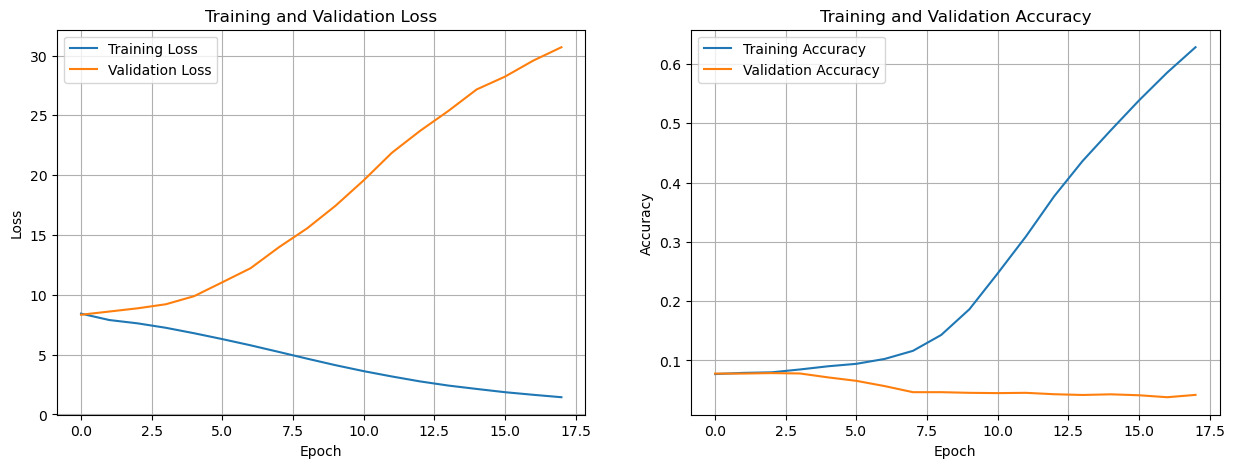

In [31]:
history=model.history

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# training and validation loss
ax1.plot(loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# training and validation accuracy
ax2.plot(acc, label='Training Accuracy')
ax2.plot(val_acc, label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)
 
# Show the plots
plt.show()


In [32]:

model.save('../Models/nep-text-pred.keras') #save the model

In [33]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('../Models/nep-text-pred.keras')

# Print the model summary to verify it was loaded correctly
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 7, 50)          │       579,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 7, 256)         │       314,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11584)          │     2,977,088 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,385,282 (51.06 MB)

 Trainable params: 4,461,760 (17.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,923,522 (34.04 MB)

<h3>We are loading the saved Model and the pickled tokenizer.</h3>

In [34]:
# Load the tokenizer
import pickle
with open('../Pickle/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

<h2>1 : Now, let us build a function to predict the next possible words from the input sequence<h2>

In [29]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def generate_seq(model, tokenizer, max_length, seed_text, n_words, top_n=3):
    in_text = seed_text
    generated_words = []
    generated_probabilities = []
    # Generate a fixed number of words
    for _ in range(n_words):
        # Encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # Pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # Predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        # Get top-n indices with highest probabilities
        top_indices = yhat.argsort()[0][-top_n:][::-1]
        top_probs = np.sort(yhat[0])[-top_n:][::-1]  # Extract top-n probabilities
        # Map predicted word indices to words
        top_words = []
        for idx in top_indices:
            for word, index in tokenizer.word_index.items():
                if index == idx:
                    top_words.append(word)
        # Append top words to generated words list
        generated_words.append(top_words)
        generated_probabilities.append(top_probs)
    return generated_words,generated_probabilities
    
def input_pred():
    while True:
        text = input(   "Enter your line (Enter '0' to exit): ")
        if text == "0":
            print("Execution completed....")
            break
        else:
            try:
                print(generate_seq(model, tokenizer, max_length-1,text,1))
            except Exception as e:
                print("Error occurred:", e)
                continue

In [30]:
input_pred()  # this function gives us an input field to enter text and shows next possible words with their probabilities

Enter your line (Enter '0' to exit):  err


([['।', 'हो', 'त']], [array([0.47149748, 0.16488007, 0.09999622], dtype=float32)])


Enter your line (Enter '0' to exit):  0


Execution completed....


<h2>2 : Now, Let us build a function to generate paragraph from the given input sequence <h2>

In [35]:

#auto text generation
def generate_paragraph(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # Generate a fixed number of words
    for _ in range(n_words):
        # Encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # Pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # Predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        # Sample a word index from the predicted probabilities
        yhat = np.argmax(yhat)
        # Map predicted word index to word
        out_word = tokenizer.index_word.get(yhat, '')
        # Append to input
        in_text += ' ' + out_word
    return in_text



print(generate_paragraph(model, tokenizer, max_length-1, 'त्यसबेला कुनै यन्त्र विज्ञान र भौतिक विज्ञानको अस्तित्व थिएन ।',80))

 <img src="images/cooking.gif" alt="Cook Image" width="100" style="display: block; margin: 0 auto;" />